In [1]:
#Import dependencies

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import seaborn.apionly as sns

#import CSV
terror = "Terrorism.csv"
df = pd.read_csv(terror, encoding = "Latin")

#Pull in columns that we need from the large data set
df2 = df[["iyear","imonth", "country_txt", "region_txt", "city", "attacktype1_txt", "targtype1_txt","nkill","nwound"]]

#Rename the columns for better understanding
renamed_df = df2.rename(columns={"iyear": "Year","imonth": "Month", "country_txt": "Country", 
                "region_txt":"Region", "city":"City", "attacktype1_txt": "Attack Type",
                "targtype1_txt":"Target Type","nkill":"Casualties","nwound":"Number Wounded"})
renamed_df['Year'] = renamed_df['Year'].astype(str)
renamed_df.head()

C:\Users\khyman003\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\apionly.py:6: UserWarning: As seaborn no longer sets a default style on import, the seaborn.apionly module is deprecated. It will be removed in a future version.
  warnings.warn(msg, UserWarning)
C:\Users\khyman003\AppData\Local\Continuum\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (61,63,79,114,115) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Year,Month,Country,Region,City,Attack Type,Target Type,Casualties,Number Wounded
0,2012,1,Pakistan,South Asia,Quetta,Bombing/Explosion,Business,0.0,12.0
1,2012,1,Kenya,Sub-Saharan Africa,Garissa,Armed Assault,Business,3.0,14.0
2,2012,1,Pakistan,South Asia,Sui,Bombing/Explosion,Military,4.0,3.0
3,2012,1,Kenya,Sub-Saharan Africa,Garissa,Armed Assault,Business,2.0,14.0
4,2012,1,Pakistan,South Asia,Peer Chhatta,Hostage Taking (Kidnapping),Private Citizens & Property,0.0,0.0


In [2]:
worldwide = renamed_df.groupby(["Year"]).count()
worldwidecount = worldwide[["Country"]]
renamed_worldwidecount = worldwidecount.rename(columns={"Country":"Number of Attacks"})


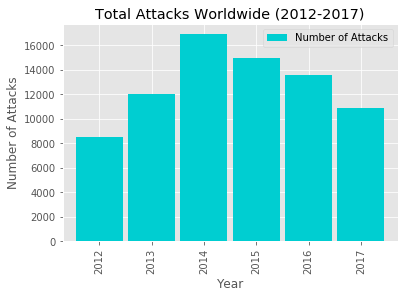

In [3]:
#Plot worldwide attacks
worldwidechart = renamed_worldwidecount.plot(kind='bar', width=.9, color = ["darkturquoise"])

worldwidechart.set_xlabel("Year")
worldwidechart.set_ylabel("Number of Attacks")
worldwidechart.set_title("Total Attacks Worldwide (2012-2017)")

worldwidechart

In [4]:
#Group the dataframe by Region, and 
terror = renamed_df.groupby(["Region"]).count()
terroryear = terror.groupby(["Year"])
terroryear.head()


,Year,Month,Country,City,Attack Type,Target Type,Casualties,Number Wounded
Region,,,,,,,,
Australasia & Oceania,46,46,46,46,46,46,46,45
Central America & Caribbean,28,28,28,28,28,28,28,27
Central Asia,62,62,62,62,62,62,62,62
East Asia,105,105,105,105,105,105,100,98
Eastern Europe,2228,2228,2228,2228,2228,2228,2128,2098
Middle East & North Africa,29839,29839,29839,29839,29839,29839,28360,27541
North America,342,342,342,342,342,342,342,342
South America,1105,1105,1105,1105,1105,1105,1091,1084
South Asia,25067,25067,25067,25067,25067,25067,24362,23914


In [5]:
#Break up dataframes by year
FY2012DF  = renamed_df.loc[renamed_df["Year"] == "2012", :]
FY2013DF  = renamed_df.loc[renamed_df["Year"] == "2013", :]
FY2014DF  = renamed_df.loc[renamed_df["Year"] == "2014", :]
FY2015DF  = renamed_df.loc[renamed_df["Year"] == "2015", :]
FY2016DF  = renamed_df.loc[renamed_df["Year"] == "2016", :]
FY2017DF  = renamed_df.loc[renamed_df["Year"] == "2017", :]


#Group by region and count how many attacks that year
Region2012 = FY2012DF.groupby(["Region"]).count()
Region2013 = FY2013DF.groupby(["Region"]).count()
Region2014 = FY2014DF.groupby(["Region"]).count()
Region2015 = FY2015DF.groupby(["Region"]).count()
Region2016 = FY2016DF.groupby(["Region"]).count()
Region2017 = FY2017DF.groupby(["Region"]).count()


#pull out one column count to plot.
Chart2012 = Region2012[["Year"]]
Chart2013 = Region2013[["Year"]]
Chart2014 = Region2014[["Year"]]
Chart2015 = Region2015[["Year"]]
Chart2016 = Region2016[["Year"]]
Chart2017 = Region2017[["Year"]]

Combined = pd.merge(Chart2012, Chart2013, on="Region")
CombinedRename = Combined.rename(columns = {"Year_x": "2012", "Year_y": "2013"})

Combined2 = pd.merge(CombinedRename, Chart2014, on="Region")
Combined2Rename = Combined2.rename(columns = {"Year":"2014"})

Combined3 = pd.merge(Combined2Rename, Chart2015, on="Region")
Combined3Rename = Combined3.rename(columns = {"Year":"2015"})

Combined4 = pd.merge(Combined3Rename, Chart2016, on="Region")
Combined4Rename = Combined4.rename(columns = {"Year":"2016"})

Combined5 = pd.merge(Combined4Rename, Chart2017, on="Region")
Combined5Rename = Combined5.rename(columns = {"Year":"2017"})
Combined5Rename

,2012,2013,2014,2015,2016,2017
Region,,,,,,
Central America & Caribbean,1,14,5,1,3,4
Central Asia,12,7,9,10,17,7
East Asia,4,15,43,28,8,7
Eastern Europe,173,165,962,684,134,110
Middle East & North Africa,2409,4560,6939,6036,6115,3780
North America,39,32,37,62,75,97
South America,133,182,283,176,159,172
South Asia,3803,4612,4998,4585,3639,3430
Southeast Asia,587,1188,1082,1072,1077,1020


In [6]:
#Middle East Chart
MiddleEast = Combined5Rename.iloc[4,:]
Africa = Combined5Rename.iloc[9, :]

Text(0.5,1,'Middle East/North Africa: Total Attacks from 2012-2017')

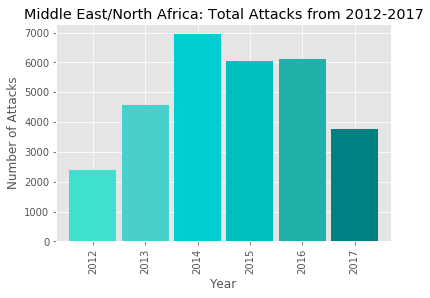

In [7]:

MEbarchart = MiddleEast.plot(kind='bar', width=.9, color = ["turquoise","mediumturquoise",
                             "darkturquoise","c","lightseagreen","teal"])

# Set the xlabel and ylabel using class methods

MEbarchart.set_xlabel("Year")
MEbarchart.set_ylabel("Number of Attacks")
MEbarchart.set_title("Middle East/North Africa: Total Attacks from 2012-2017")

#Terroism is on the decline, what could be driving that? why were attacks high in 2014? Islamic state decline?

Text(0.5,1,'Middle East & North Africa Average # of Casualties by Month (2012-2017)')

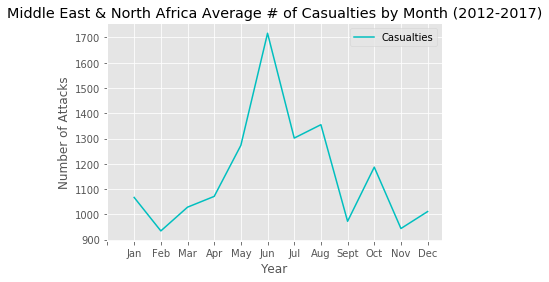

In [8]:
newdf = renamed_df[["Year","Month","Region","Casualties"]]
onlyME = newdf.loc[newdf["Region"] == "Middle East & North Africa",:]
MEbyyear = (onlyME.groupby(["Month"]).sum())/6

MElinechart2 = MEbyyear.plot(color="c")
titles = ("","Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sept","Oct","Nov","Dec")
y_pos = np.arange(len(titles))
plt.xticks(y_pos, titles)
MElinechart2.set_xlabel("Year")
MElinechart2.set_ylabel("Number of Attacks")
MElinechart2.set_title("Middle East & North Africa Average # of Casualties by Month (2012-2017)")

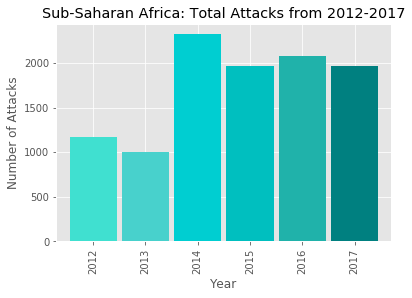

In [9]:
#Show how many incidences happened each year in Sub-Saharan Africa
africabarchart = Africa.plot(kind='bar',width=.9, color = ["turquoise","mediumturquoise",
                             "darkturquoise","c","lightseagreen","teal"])
africabarchart.set_xlabel("Year")
africabarchart.set_ylabel("Number of Attacks")
africabarchart.set_title("Sub-Saharan Africa: Total Attacks from 2012-2017")

africabarchart

In [10]:
#Get 2014 Africa data by month, show how many casualities each month.
newdf = renamed_df[["Year","Month","Region","Casualties"]]
onlyafrica = newdf.loc[newdf["Region"] == "Sub-Saharan Africa",:]


#africa2014 = onlyafrica.loc[onlyafrica["Year"] == "2014",:]
#africa2014months = africa2014.groupby("Month").sum()
#africa2014sorted = africa2014months.sort_index(ascending=1)
#africa2014sorted.T

#africalinechart = africa2014sorted.plot(figsize=(10,6), color="c", xticks=range(1, 13))
#africalinechart.set_xlabel("Month")
#africalinechart.set_ylabel("Number of Attacks")
#africalinechart.set_title("FY2014: Sub-Saharan Africa Attacks by Month")


Text(0.5,1,'Sub-Saharan Africa Average # of Casualties by Month (2012-2017)')

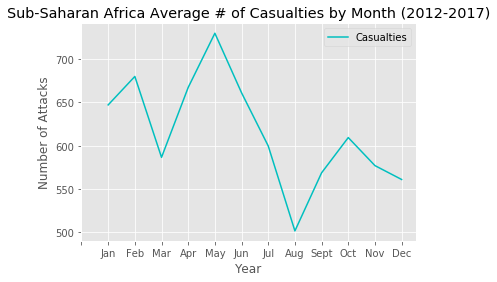

In [11]:
#Get Africa data by month, show how average number of casualities each month.

africabyyear = (onlyafrica.groupby(["Month"]).sum())/6
africabyyear.T

africalinechart2 = africabyyear.plot(color="c")
titles = ("","Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sept","Oct","Nov","Dec")
y_pos = np.arange(len(titles))
plt.xticks(y_pos, titles)
africalinechart2.set_xlabel("Year")
africalinechart2.set_ylabel("Number of Attacks")
africalinechart2.set_title("Sub-Saharan Africa Average # of Casualties by Month (2012-2017)")